In [1]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [3]:
from src.plots import Plot

In [4]:
df = pd.read_csv('data/outliers_clean.csv')

In [5]:
plot = Plot()

In [6]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141014 entries, 0 to 141013
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       141014 non-null  float64
 1   start                           141014 non-null  object 
 2   start_ms                        141014 non-null  float64
 3   end                             141014 non-null  object 
 4   end_ms                          141014 non-null  float64
 5   dur._(ms)                       141014 non-null  float64
 6   imsi                            141014 non-null  float64
 7   msisdn/number                   141014 non-null  float64
 8   imei                            141014 non-null  float64
 9   last_location_name              141014 non-null  object 
 10  avg_rtt_dl_(ms)                 141014 non-null  float64
 11  avg_rtt_ul_(ms)                 141014 non-null  float64
 12  avg_bearer_tp_dl

In [8]:
# Aggregate engagement metrics per customer (by MSISDN)
customer_engagement = df.groupby("msisdn/number").agg({
    "bearer_id": "count",  # Sessions frequency
    "dur._(ms)": "sum",  # Total session duration
    "total_dl_(bytes)": "sum",  # Total download traffic
    "total_ul_(bytes)": "sum",  # Total upload traffic
}).rename(columns={
    "bearer_id": "session_frequency",
    "dur._(ms)": "total_session_duration",
    "total_dl_(bytes)": "total_download_traffic",
    "total_ul_(bytes)": "total_upload_traffic",
})

customer_engagement["total_traffic"] = customer_engagement["total_download_traffic"] + customer_engagement["total_upload_traffic"]
# Display the first few rows of the aggregated data
customer_engagement.head()  # Summary statistics for the aggregated data


,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09
3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08


In [9]:
customer_engagement.describe()

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
count,100187.000000,1.001870e+05,1.001870e+05,1.001870e+05,1.001870e+05
mean,1.407508,1.452165e+05,6.394800e+08,5.787595e+07,6.973559e+08
std,3.290613,2.798421e+05,1.526077e+09,1.375910e+08,1.660781e+09
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07
25%,1.000000,6.951900e+04,3.148002e+08,3.641702e+07,3.584078e+08
50%,1.000000,1.011980e+05,5.709696e+08,4.686072e+07,6.186261e+08
75%,2.000000,1.727990e+05,8.082853e+08,6.607412e+07,8.583293e+08
max,1011.000000,6.709022e+07,4.606132e+11,4.211225e+10,5.027255e+11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '33603127838.0'),
  Text(1, 0, '33604515716.0'),
  Text(2, 0, '33614892860.0'),
  Text(3, 0, '33625779332.0'),
  Text(4, 0, '33626320676.0'),
  Text(5, 0, '33659725664.0'),
  Text(6, 0, '33663706799.0'),
  Text(7, 0, '33667163239.0'),
  Text(8, 0, '33675877202.0'),
  Text(9, 0, '33760536639.0')])

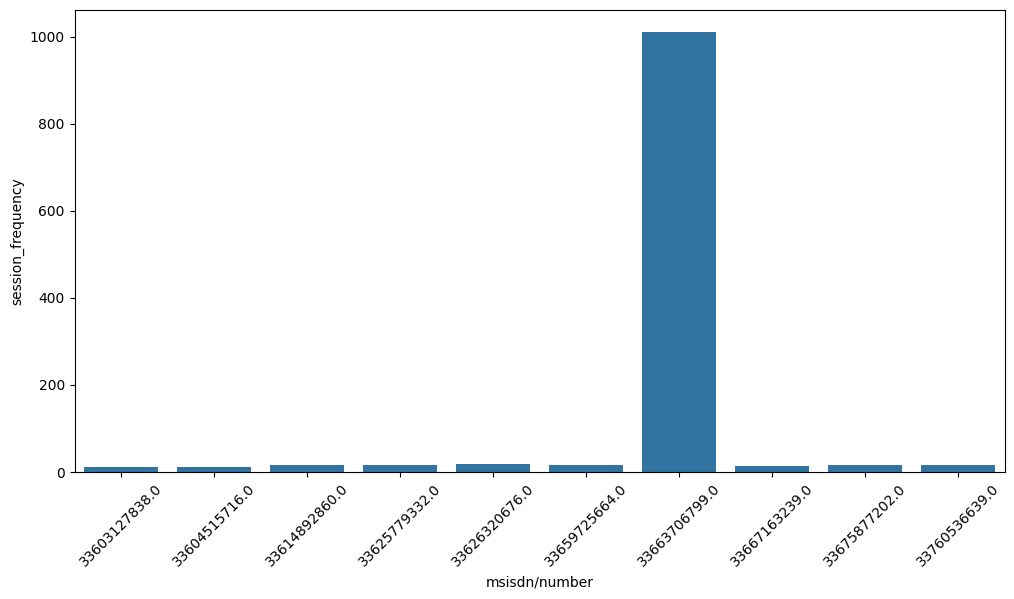

In [10]:
# Top 10 Customers with Highest Session Frequency
customer_engagement.nlargest(10, "session_frequency")

# Make a bar plot for the top 10 customers with highest session frequency
plt.figure(figsize=(12, 6))
sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement.nlargest(10, "session_frequency"))
plt.xticks(rotation=45)

Seems like one USER(33663706799.0) has a session with largest session frequency, lets remove it for now

In [11]:
column_name = 'msisdn/number'
value = 33663706799.0
mask = customer_engagement.index == value
customer_engagement_filtered_max = customer_engagement[~mask]

C:\Users\user\AppData\Local\Temp\ipykernel_19812\3328664298.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement_filtered_max.nlargest(10, "session_frequency"), color="purple", hue="session_frequency")


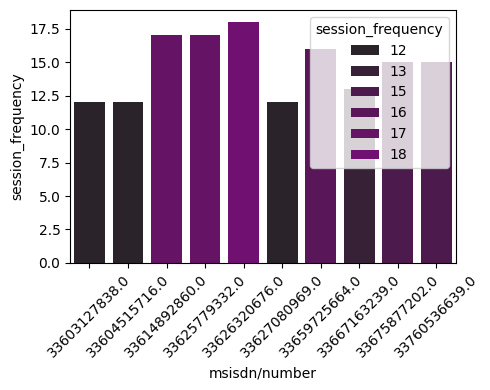

In [12]:
plt.figure(figsize=(5, 4))
sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement_filtered_max.nlargest(10, "session_frequency"), color="purple", hue="session_frequency")
plt.xticks(rotation=45)
plt.tight_layout()

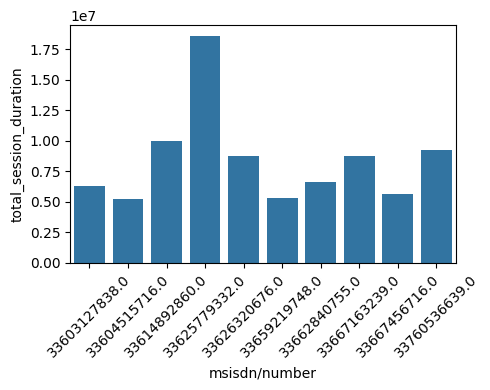

In [13]:
plt.figure(figsize=(5, 4))
sns.barplot(x="msisdn/number",
             y="total_session_duration",
             data=customer_engagement_filtered_max.nlargest(10, "total_session_duration"))
plt.xticks(rotation=45)
plt.tight_layout()

In [14]:
# Find the top 10 customers for each engagement metric
top_10_session_frequency = customer_engagement.nlargest(10, "session_frequency")
top_10_total_session_duration = customer_engagement.nlargest(10, "total_session_duration")
top_10_total_download_traffic = customer_engagement.nlargest(10, "total_download_traffic")
top_10_total_upload_traffic = customer_engagement.nlargest(10, "total_upload_traffic")

# Return the top 10 customers for each metric
top_10_session_frequency

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
3.360313e+10,12,6287761.0,4.540607e+09,4.355876e+08,4.976195e+09


In [15]:
top_10_total_session_duration


,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
3.366284e+10,9,6614270.0,3.593674e+09,4.064244e+08,4.000098e+09
3.360313e+10,12,6287761.0,4.540607e+09,4.355876e+08,4.976195e+09
3.366746e+10,6,5649882.0,2.334299e+09,2.662226e+08,2.600522e+09


In [16]:
top_10_total_download_traffic

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
3.366646e+10,11,4536757.0,6.903440e+09,4.050610e+08,7.308501e+09
3.366471e+10,11,2927785.0,6.400774e+09,4.712445e+08,6.872018e+09


In [17]:
top_10_total_upload_traffic  # Display the results

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
3.369879e+10,11,5169128.0,6.010556e+09,5.303431e+08,6.540899e+09


These top 10 customers demonstrate varying levels of engagement across each metric. Now that we've identified the top customers, the next step is to normalize these metrics and perform a k-means clustering with k=3.

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# Normalize the engagement metrics for clustering

# normalizer = Normalizer() # Uncomment this line to use Normalizer
# scaler = StandardScaler() # Uncomment this line to use StandardScaler
_MinMaxScaler = MinMaxScaler() # Uncomment this line to use MinMaxScaler

normalized_engagement = _MinMaxScaler.fit_transform(customer_engagement)

# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
customer_engagement["cluster"] = kmeans.fit_predict(normalized_engagement)

# Compute the minimum, maximum, average, and total for each metric in each cluster
cluster_summary = customer_engagement.groupby("cluster").agg({
    "session_frequency": ["min", "max", "mean", "sum"],
    "total_session_duration": ["min", "max", "mean", "sum"],
    "total_download_traffic": ["min", "max", "mean", "sum"],
    "total_upload_traffic": ["min", "max", "mean", "sum"],
    "total_traffic": ["min", "max", "mean", "sum"],
})

# Display the summary statistics for each cluster
cluster_summary  # Summarize the results for each cluster


session_frequency                            total_session_duration  \
                      min   max         mean     sum                    min   
cluster                                                                       
0                       1     4     1.213328  110084                 7142.0   
1                    1011  1011  1011.000000    1011             67090218.0   
2                       1    18     3.163688   29919                85554.0   

                                                total_download_traffic  \
                max          mean           sum                    min   
cluster                                                                  
0          451768.0  1.107463e+05  1.004790e+10           8.827082e+06   
1        67090218.0  6.709022e+07  6.709022e+07           4.606132e+11   
2        18553754.0  4.688395e+05  4.433816e+09           1.904514e+07   

                                                  total_upload_traffic  \
                  max          mean           sum                  min   
cluster                                                                  
0        2.334531e+09  5.447725e+08  4.942666e+13         2.866892e+06   
1        4.606132e+11  4.606132e+11  4.606132e+11         4.211225e+10   
2        8.156743e+09  1.499450e+09  1.418030e+13         9.439375e+06   

                                                  total_traffic                \
                  max          mean           sum           min           max   
cluster                                                                         
0        2.049022e+08  4.984868e+07  4.522721e+12  3.324901e+07  2.439177e+09   
1        4.211225e+10  4.211225e+10  4.211225e+10  5.027255e+11  5.027255e+11   
2        7.295774e+08  1.304415e+08  1.233585e+12  5.714004e+07  8.846226e+09   

                                     
                 mean           sum  
cluster                              
0        5.946212e+08  5.394938e+13  
1        5.027255e+11  5.027255e+11  
2        1.629892e+09  1.541389e+13

### Cluster 0
- Total Session Duration: Ranges from 85,554 ms to 18,553,754 ms, with a mean of approximately 474,150 ms.
- Total Download Traffic: Has a wide range, from about 19 MB to 8 GB, with an average of about 1.5 GB.
- Total Upload Traffic: Varies between 9 MB and 729 MB, with a mean of about 131 MB.
    - Session Frequency: Customers in this cluster have between 1 and 18 sessions, with an average of 3 sessions.
    - Total Traffic: The total traffic ranges from about 57 MB to 8.8 GB, with an average of 1.6 GB.
This cluster appears to represent low-to-moderate engagement customers with a small number of sessions and moderate traffic levels.

### Cluster 1
- Total Session Duration: Ranges from 7,142 ms to 451,768 ms, with a mean of approximately 111,216 ms.
- Total Download Traffic: Between 8.8 MB and 2.3 GB, with a mean of about 546 MB.
- Total Upload Traffic: Between 2.8 MB and 204 MB, with a mean of about 49 MB.
    - Session Frequency: This cluster has between 1 and 4 sessions, with a mean of about 1.2 sessions.
    - Total Traffic: The total traffic ranges from about 33 MB to 2.4 GB, with a mean of about 596 MB.
Cluster 1 has customers with lower session frequency and traffic. These are likely low-engagement customers with occasional activity.

### Cluster 2
- Total Session Duration: This cluster has only one customer with a session duration of 67,090,218 ms (the outlier).
- Total Download Traffic: This customer has over 460 GB of download traffic.
- Total Upload Traffic: This customer has 42 GB of upload traffic.
    - Session Frequency: This cluster contains one customer with 1,011 sessions.
    - Total Traffic: Total traffic in this cluster is approximately 502 GB.
Cluster 2 represents high-engagement customers with significant traffic and session frequency. This is an outlier cluster.

### Interpretation
- Cluster 0: This cluster represents customers with low engagement across all metrics. They have fewer sessions, shorter durations, and lower traffic.
- Cluster 1: This cluster is an outlier with extremely high engagement in all metrics. This suggests a highly active user or a unique use case.
- Cluster 2: This cluster represents customers with moderate engagement, characterized by longer session durations and higher download/upload traffic than Cluster 0.

<Figure size 640x480 with 0 Axes>

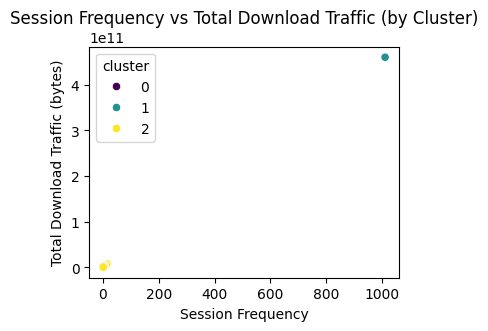

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for total download traffic vs session frequency, color-coded by cluster and make it fit in to the visual box size and scale down the x and y
plt.tight_layout()
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=customer_engagement,
    x="session_frequency",
    y="total_download_traffic",
    hue="cluster",
    palette="viridis",
)
plt.title("Session Frequency vs Total Download Traffic (by Cluster)")
plt.xlabel("Session Frequency")
plt.ylabel("Total Download Traffic (bytes)")
plt.show()  # Display the plot


- Cluster 0: Generally low session frequency and low download traffic.
- Cluster 1: Exhibits moderate session frequency with varied levels of download traffic.
- Cluster 2: Represents a single customer with extremely high session frequency and download traffic.

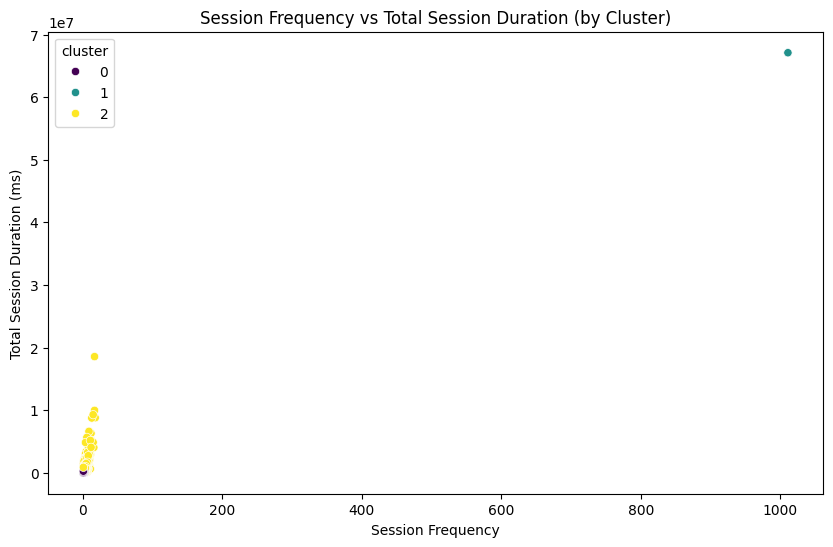

In [20]:
# Scatter plot for total session duration vs session frequency, color-coded by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_engagement,
    x="session_frequency",
    y="total_session_duration",
    hue="cluster",
    palette="viridis",
)
plt.title("Session Frequency vs Total Session Duration (by Cluster)")
plt.xlabel("Session Frequency")
plt.ylabel("Total Session Duration (ms)")
plt.show()  # Display the plot


C:\Users\user\AppData\Local\Temp\ipykernel_19812\1541228237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


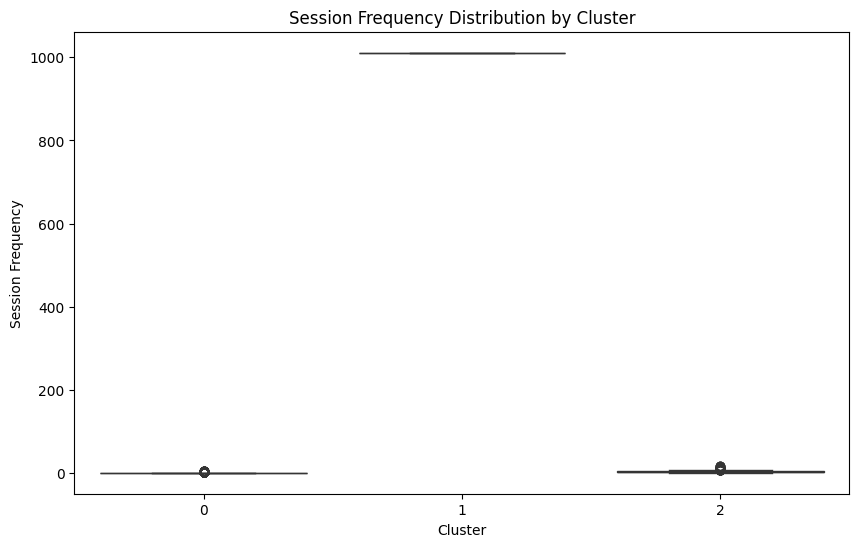

In [21]:
# Re-attempt the box plot for session frequency across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=customer_engagement,
    x="cluster",
    y="session_frequency",
    palette="viridis",
)
plt.title("Session Frequency Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Session Frequency")
plt.show()  # Display the box plot


In [22]:
# Create a dictionary to map application names to corresponding download and upload traffic columns
app_traffic_dict = {
    "social_media": ["social_media_dl_(bytes)", "social_media_ul_(bytes)"],
    "google": ["google_dl_(bytes)", "google_ul_(bytes)"],
    "email": ["email_dl_(bytes)", "email_ul_(bytes)"],
    "youtube": ["youtube_dl_(bytes)", "youtube_ul_(bytes)"],
    "netflix": ["netflix_dl_(bytes)", "netflix_ul_(bytes)"],
    "gaming": ["gaming_dl_(bytes)", "gaming_ul_(bytes)"],
    "other": ["other_dl_(bytes)", "other_ul_(bytes)"]
}
app_traffic_per_user = pd.DataFrame(index=customer_engagement_filtered_max.index)

for app_name, traffic_columns in app_traffic_dict.items():
    dl_col, ul_col = traffic_columns  # Separate download and upload columns
    app_traffic_per_user[f"{app_name}_total_traffic"] = (
        df.groupby("msisdn/number")[dl_col].sum() + df.groupby("msisdn/number")[ul_col].sum()
    )

# Now find the top 10 most engaged users for each application based on total traffic
top_10_app_users = {}

for app_name in app_traffic_dict.keys():
    top_10_app_users[app_name] = app_traffic_per_user.nlargest(10, f"{app_name}_total_traffic")

top_10_app_users  # Display the top 10 most engaged users for each application


{'social_media':                social_media_total_traffic  google_total_traffic  \
 msisdn/number                                                     
 3.362632e+10                   43374779.0           152191852.0   
 3.376054e+10                   39783189.0           123223099.0   
 3.365973e+10                   35412358.0           116516345.0   
 3.361489e+10                   28294544.0           127973787.0   
 3.362578e+10                   27135500.0           142307915.0   
 3.366716e+10                   24247850.0           105032696.0   
 3.378632e+10                   23974919.0           110254484.0   
 3.366907e+10                   23800834.0            77824684.0   
 3.360313e+10                   23077825.0            86929016.0   
 3.365849e+10                   23000066.0            76434143.0   
 
                email_total_traffic  youtube_total_traffic  \
 msisdn/number                                               
 3.362632e+10            42418782.0       

Here are the top 10 most engaged users for each application, based on their total traffic (download + upload):

### Social Media
The customer with ID 3.366371e+10 leads with about 1.87 GB of total traffic. The other users have significantly lower traffic, indicating a substantial gap.

### Google
The top customer has over 7.80 GB of total traffic, again led by 3.366371e+10. Other top users range from 152 MB to over 1 GB.

### Email
The top customer has 2.27 GB of total email traffic, again led by 3.366371e+10. The rest of the top 10 users range from 42 MB to over 40 MB.

### YouTube
The top user has over 23 GB of total YouTube traffic. The other users in the top 10 range from 274 MB to 4.5 GB, suggesting significant variation.

### Netflix
The customer 3.366371e+10 tops this list with over 22 GB of Netflix traffic. The other users in the top 10 range from 328 MB to 3.6 GB.

### Gaming
The same top customer leads this list with over 436 GB of gaming traffic, a substantial outlier. The other top 10 users range from 4.2 GB to over 73 GB.

### Other
In this category, the top user has over 425 GB of traffic, while others range from 5 GB to over 8 GB.

## Interpretation
These results indicate that the customer with ID 3.366371e+10 is a significant outlier in terms of traffic and engagement across multiple applications. Other top users show considerable variation in their total traffic, indicating varying levels of engagement.

In [23]:
flattened_dict = {k: v for d in top_10_app_users.values() for k, v in d.items()}
_top_10_app_users = pd.DataFrame.from_dict(flattened_dict)
_top_10_app_users

,social_media_total_traffic,google_total_traffic,email_total_traffic,youtube_total_traffic,netflix_total_traffic,gaming_total_traffic,other_total_traffic
msisdn/number,,,,,,,
3.362632e+10,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09
3.361489e+10,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09
3.367588e+10,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09
3.362578e+10,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
3.360313e+10,23077825.0,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
3.365973e+10,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09
3.362708e+10,17808911.0,87125921.0,23567219.0,308790774.0,267040897.0,4.972353e+09,5.117791e+09
3.376127e+10,14496080.0,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
3.365836e+10,17285759.0,76507138.0,19682048.0,260989846.0,264142078.0,5.705920e+09,5.013651e+09


In [24]:
customer_engagement.groupby('cluster').sum()['session_frequency']

cluster
0    110084
1      1011
2     29919
Name: session_frequency, dtype: int64

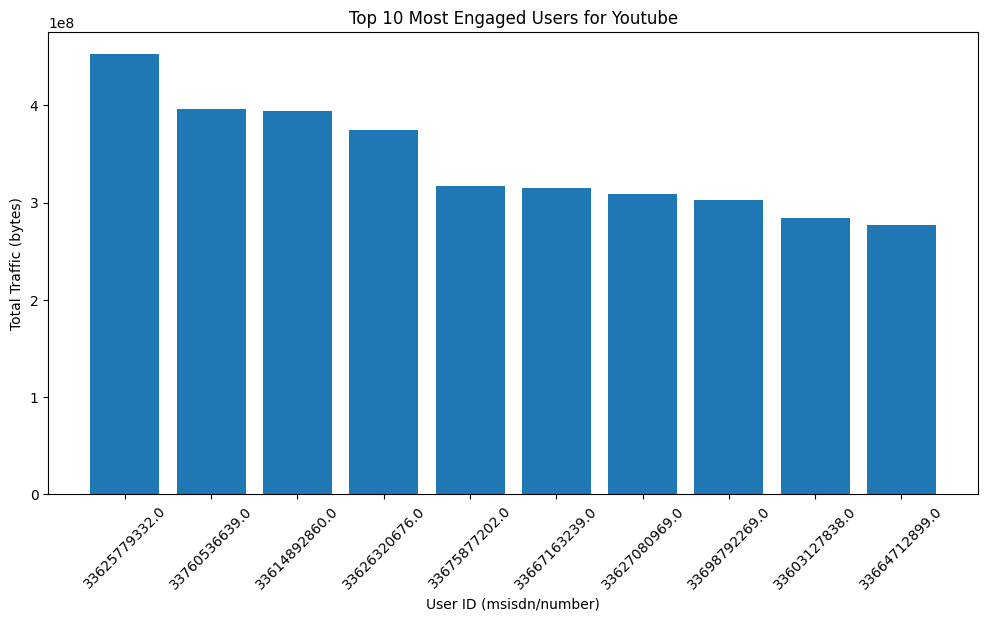

In [25]:
# Define the application name for which you want to plot the top 10 most engaged users
application_name = "youtube"  # You can change this to "social_media", "google", "email", "netflix", "gaming", "other"

# Retrieve the top 10 most engaged users for the specified application
top_10_users = top_10_app_users[application_name]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_users.index.astype(str), top_10_users[f"{application_name}_total_traffic"])
plt.xlabel("User ID (msisdn/number)")
plt.ylabel("Total Traffic (bytes)")
plt.title(f"Top 10 Most Engaged Users for {application_name.title()}")
plt.xticks(rotation=45)
plt.show()


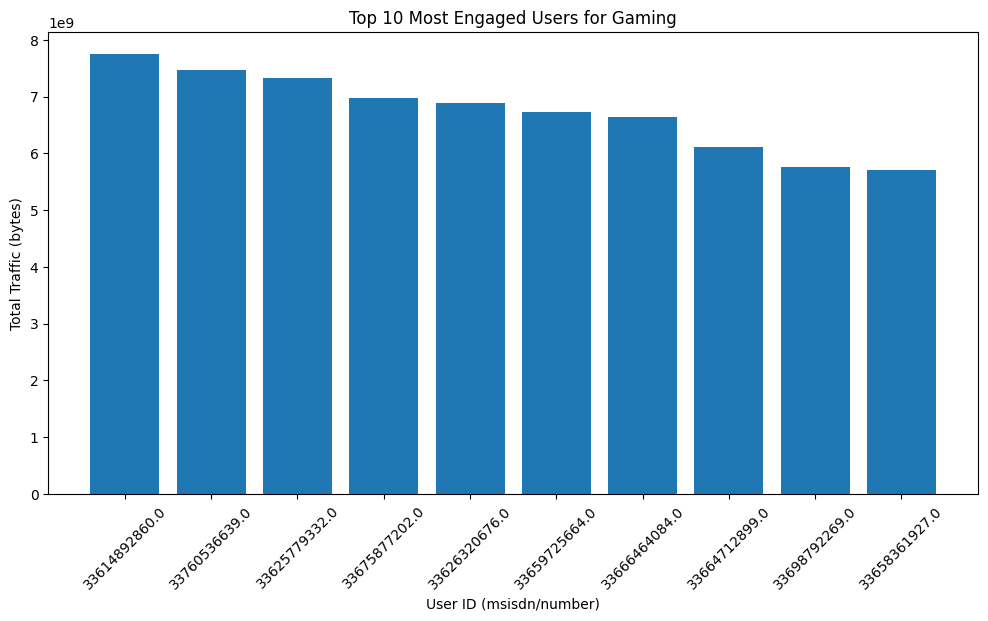

In [26]:
# Define the application name for which you want to plot the top 10 most engaged users
application_name = "gaming"  # You can change this to "social_media", "google", "email", "netflix", "gaming", "other"

# Retrieve the top 10 most engaged users for the specified application
top_10_users = top_10_app_users[application_name]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_users.index.astype(str), top_10_users[f"{application_name}_total_traffic"])
plt.xlabel("User ID (msisdn/number)")
plt.ylabel("Total Traffic (bytes)")
plt.title(f"Top 10 Most Engaged Users for {application_name.title()}")
plt.xticks(rotation=45)
plt.show()

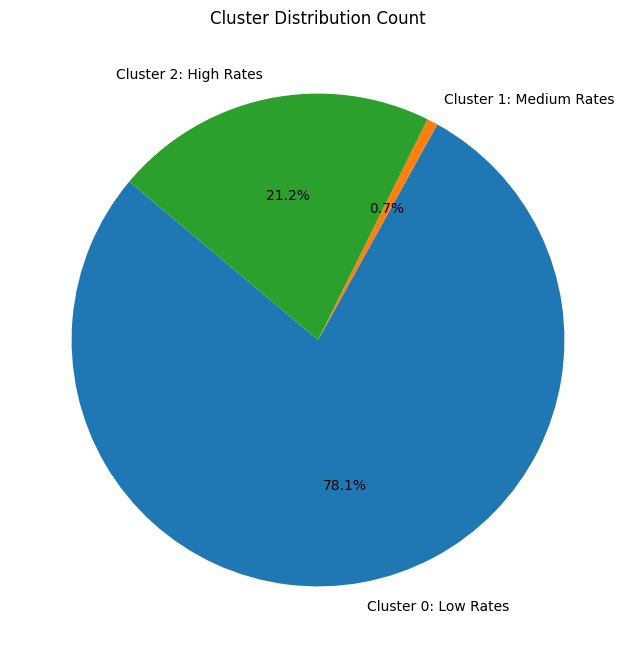

In [27]:
# data = [cluster1.sessions.count(), cluster2.sessions.count(), cluster3.sessions.count()]
keys = ['Cluster 0: Low Rates', 'Cluster 1: Medium Rates', 'Cluster 2: High Rates']
# define Seaborn color palette to use
plot = Plot()
plot.plot_pie(data=customer_engagement.groupby('cluster').sum()['session_frequency'], label=keys, title="Cluster Distribution Count")

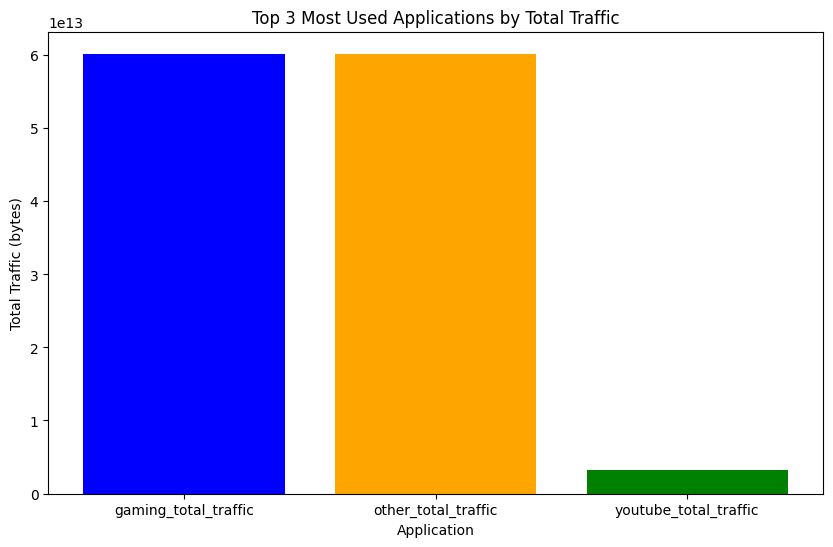

In [28]:
import matplotlib.pyplot as plt

# Sum the total traffic for each application to find the top 3 most used applications
total_traffic_per_app = app_traffic_per_user.sum(axis=0)

# Find the top 3 most used applications
top_3_apps = total_traffic_per_app.nlargest(3)

# Plot a bar chart to show the top 3 most used applications
plt.figure(figsize=(10, 6))
plt.bar(top_3_apps.index, top_3_apps.values, color=["blue", "orange", "green"])
plt.xlabel("Application")
plt.ylabel("Total Traffic (bytes)")
plt.title("Top 3 Most Used Applications by Total Traffic")
plt.show()  # Display the plot


In [29]:
top_10_app_users

{'social_media':                social_media_total_traffic  google_total_traffic  \
 msisdn/number                                                     
 3.362632e+10                   43374779.0           152191852.0   
 3.376054e+10                   39783189.0           123223099.0   
 3.365973e+10                   35412358.0           116516345.0   
 3.361489e+10                   28294544.0           127973787.0   
 3.362578e+10                   27135500.0           142307915.0   
 3.366716e+10                   24247850.0           105032696.0   
 3.378632e+10                   23974919.0           110254484.0   
 3.366907e+10                   23800834.0            77824684.0   
 3.360313e+10                   23077825.0            86929016.0   
 3.365849e+10                   23000066.0            76434143.0   
 
                email_total_traffic  youtube_total_traffic  \
 msisdn/number                                               
 3.362632e+10            42418782.0       

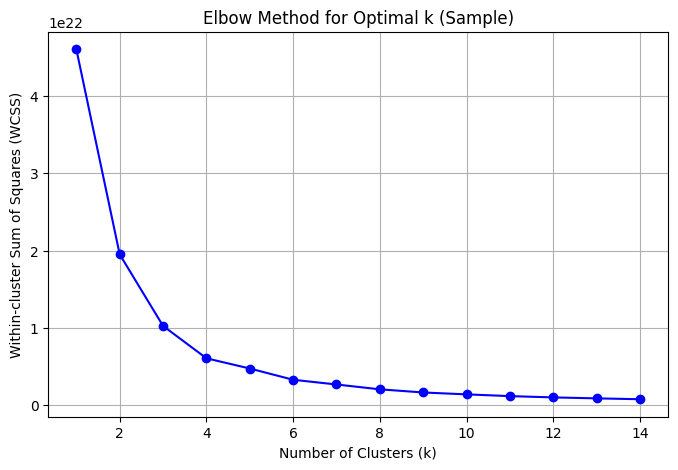

In [37]:
# Take a random sample of the clustering data to reduce computation time
sample_clustering_data = customer_engagement_filtered_max.sample(n=100000, random_state=42)  # Sample of 1000 records

# Re-run the elbow method with the smaller sample
wcss_sample = []
# Define a range of possible cluster numbers
k_values = range(1, 15)  # Testing 1 through 10 clusters

# Compute WCSS for each k value with the smaller sample
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample_clustering_data)
    wcss_sample.append(kmeans.inertia_)

# Plot the elbow curve with the smaller sample
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss_sample, marker='o', linestyle='-', color='b', label='WCSS (Sample)')
plt.title('Elbow Method for Optimal k (Sample)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()  # Display the elbow curve plot for the smaller sample


### How the Elbow Method Works
- Inertia: In the context of K-means, inertia measures the total sum of squared distances between each point and its corresponding cluster centroid. It gives an indication of how tightly the clusters are formed.
- Elbow Point: In the elbow method, the goal is to plot the inertia against the number of clusters (k). Initially, as k increases, the inertia tends to decrease rapidly because more clusters can fit the data more closely. At some point, adding more clusters leads to diminishing returns, creating an "elbow" shape in the plot.
- Optimal k: The optimal number of clusters is usually at the point where the rate of decrease in inertia begins to level off, forming an "elbow." This point represents a balance between the compactness of clusters and overfitting.

Hence we can conclude from the above figure k=3 or 4 is the optimal k value